    Nesse notebook são feitas análises direcionadas à respostas de algumas perguntas feitas anteriormente. Para a conclusão dessas respostas, grande parte das ideias e observações sobre os dados tem como base a análise feita no notebook par desse, não somente, foi feito o uso de alguns gráficos para a demonstração de conclusões e raciocínios

## Bibliotecas utilizadas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"/home/vinicius_olzon/Documents/Programacao/Projeto_Final_ICD/top10s.csv")
df = pd.DataFrame(data)

## Análise e tratamento dos dados

Aqui foi retirado uma coluna desnecessária para a seguinte análise, tal como foi feita uma filtragem dos gêneros musicais.

In [4]:
musics = df.drop("Unnamed: 0", axis = 1)

In [5]:
for sub_genre in musics["top genre"]:
    if "pop" in sub_genre:
        musics["top genre"].replace({sub_genre: "pop"}, inplace=True)

for sub_genre in musics["top genre"]:
    if "hip hop" in sub_genre:
        musics["top genre"].replace({sub_genre: "hip hop"}, inplace=True)

for sub_genre in musics["top genre"]:
    if "electronic" in sub_genre:
        musics["top genre"].replace({sub_genre: "electronic"}, inplace=True)

for sub_genre in musics["top genre"]:
    if "house" in sub_genre:
        musics["top genre"].replace({sub_genre: "house"}, inplace=True)

for sub_genre in musics["top genre"]:
    if "r&b" in sub_genre:
        musics["top genre"].replace({sub_genre: "r&b"}, inplace=True)

for sub_genre in musics["top genre"]:
    if "soul" in sub_genre:
        musics["top genre"].replace({sub_genre: "soul"}, inplace=True)

for sub_genre in musics["top genre"]:
    if "rock" in sub_genre:
        musics["top genre"].replace({sub_genre: "rock"}, inplace=True)

for sub_genre in musics["top genre"]:
    if "indie" in sub_genre:
        musics["top genre"].replace({sub_genre: "indie"}, inplace=True)

for sub_genre in musics["top genre"]:
    if "latin" in sub_genre:
        musics["top genre"].replace({sub_genre: "latin"}, inplace=True)

## Existe uma correlação entre o quanto uma música é fácil de se dançar e o quanto ela é alegre/positiva ? Se sim, como ela se comporta?

Com base nas análises no notebook par desse, é concluído que existe sim uma correlação.

In [6]:
corr_violence_romance = musics["val"].corr(musics["dnce"])
corr_violence_romance.round(decimals = 4)

0.5017

Como visto acima, a postividade de uma música tem uma correlação com a dançabilidade dessas mesmas, no caso (0.5017).

Não somente, é possível visualizar isso no gráfico abaixo:

<AxesSubplot:xlabel='val', ylabel='dnce'>

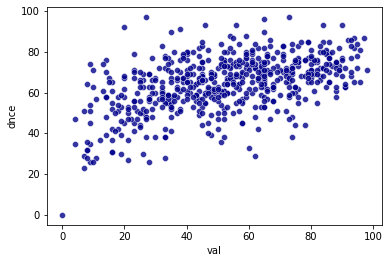

In [7]:
sns.scatterplot(data = musics, x = musics["val"], y = musics["dnce"], alpha = 0.8, color = "darkblue")

    Observando o gráfico, pode-se perceber a relação de uma característica com a outra, todavia, pelo índice de correlação (0.5017) não ser tão significativo, é concluído que é mais fácil e provável de se dançar uma música que trata sobre conteúdo positivo/alegre, porém, não é o único fator que influencia nesse aspecto.

## As músicas mais populares entre 2010 e 2019 são consideradas alegres/positivas ?

Para responder a essa pergunta, primeiro é necessário estabelecer um parâmetro do que significa uma música ser alegre e/ou positiva. O qual é definido majoritariamente por dois aspectos, o primeiro trata sobre as escalas musicais utilizadas, e o outro tem relação direta sobre as palavras cantadas na música em questão.

Para tal parâmetro, foi utilizado os índices de alegria e positividade do dataset, que seguem a seguinte escala:

+ 0 <= índice <= 20     = Abaixo do normal
+ 20 <= índice <= 40    = Normal
+ 40 <= índice <= 60    = Alegre
+ 60 <= índice <= 80    = Muito alegre
+ 80 <= índice <= 100   = Extremamente alegre


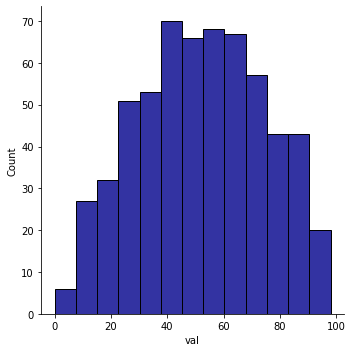

In [8]:
sns.displot(x= "val", data=musics, alpha=0.8, color = "darkblue")


In [9]:
df["val"].describe()

count    603.000000
mean      52.225539
std       22.513020
min        0.000000
25%       35.000000
50%       52.000000
75%       69.000000
max       98.000000
Name: val, dtype: float64

Após o entendimento das análises descritivas sobre os índices de positivade de cada música, junto com o gráfico dos índices de positividade de cada música, pode-se perceber que a maior parte das músicas se encaixam na categoria "Alegre".

    Dessa forma, é possível de se concluir que as músicas mais populares entre 2010 e 2019, em sua grande maioria têm um humor alegre e positivo.

## Qual o gênero musical mais/menos popular entre 2010 e 2019 e quais tendem a crescer/diminuir nos anos seguintes ?

Para a primeira pergunta, antes é preciso analisar qual gênero foi considerado mais e menos popular.

In [23]:
musics["top genre"].mode()

0    pop
Name: top genre, dtype: object

    Como já esperado, o gênero musical mais popular nessa década foi o pop.

Agora para fazer a previsão sobre quais gêneros tendem a crescer e quais tendem a diminuir:

##    Qual a duração, em média, das músicas mais populares entre 2010 e 2019 ?


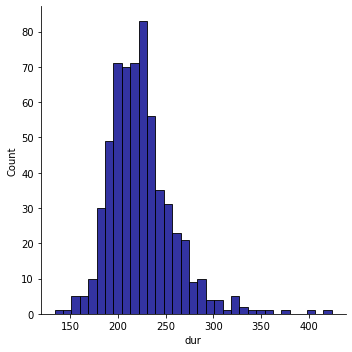

In [11]:
sns.displot(x= "dur", data=musics, alpha=0.8, color = "darkblue")


In [12]:
df["dur"].mean()

224.67495854063017

    As músicas mais populares entre 2010 e 2019 têm duração média de 224 segundos, (3 minutos e 44 segundos).

##    Qual a relação entre energia e a acústica das músicas ?

In [13]:
corr_acoustic_energy = musics["acous"].corr(musics["nrgy"])
corr_acoustic_energy.round(decimals = 4)

-0.5623

Com base no índice de correlação entre a energia e a acústica das músicas acima, (-0.5623), pode ser concluído que existe uma correlação negativa considerável.

<AxesSubplot:xlabel='nrgy', ylabel='acous'>

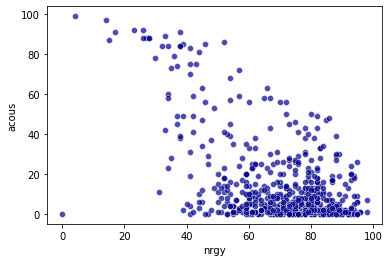

In [14]:
sns.scatterplot(data = musics, x = 'nrgy', y = 'acous', alpha=0.7, color = "darkblue")

    Após analisar o índice de correlação (-0.5623) e o gráfico acima, é evidente que quanto mais uma música é energética, menos ela tende a ser considerada acústica.